# Volume Dataset Analysis

In this exercise you will be analyzing a DICOM dataset. This dataset is not as conveniently organized on the filesystem as some of the datasets we have seen in the lesson just now. Rather, this dataset looks like somethign that you are likely to get as a raw dump from a clinical data archive.  

Your task is to use the skills you have acquired in this lesson to go through this dataset and answer (or provide your best quess to) the following questions:
1. What imaging modality was used to produce this dataset?
1. Data from how many patients does the dataset include?
1. How many studies are in the dataset?
1. What is the oldest and most recent study in the dataset?
1. How many series are in the dataset?

In addition, do the following tasks:

1. List voxel dimensions of all 3D volumes (i.e. series) that the dataset contains as WxHxD
1. The dataset contains two outliers. Can you find them? Type up why do you think these volumes are outliers.

<TYPE YOUR ANSWERS HERE>

In [16]:
import pydicom
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil

The file isn’t in the DICOM File Format but contains DICOM data, use "force=true", this will get further question, check the file foler, one document is not dicom data, remove


In [17]:

path = r"data3D"
dirs = np.array([[(os.path.join(dp, f), pydicom.dcmread(os.path.join(dp, f),   stop_before_pixels = True)) for f in files]
                   for dp,_,files in os.walk(path) if len(files) != 0])

In [18]:
instances = dirs[0]
len(instances)

479

In [19]:
len(dirs)

1

In [20]:
# calculate series
series_uids = np.unique([inst[1].SeriesInstanceUID for inst in instances])

len(series_uids)

16

In [21]:
studies_uids = np.unique([inst[1].StudyInstanceUID for inst in instances])
len(studies_uids)

6

In [22]:
# how many patients
patient_ids = [inst[1].PatientID for inst in instances]
len(patient_ids)

479

In [23]:
patients_ids_uq = np.unique(patient_ids)
print(f"Number of patients: {len(patients_ids_uq)}, patient IDs: {patients_ids_uq}")

Number of patients: 4, patient IDs: ['123456' 'OPA135179' 'PGBM-003' 'PGBM-004']


In [24]:
# Create hash of all modalities for individual series

series_uids_modality_map = {uid: s[1].Modality for uid in series_uids for s in instances if s[1].SeriesInstanceUID == uid }


TypeError: unhashable type: 'slice'

In [26]:
series_uids_modality_map

{'1.2.826.0.1.3680043.2.1125.1.45859137663006505718300393375464286': 'CT',
 '1.3.12.2.1107.5.2.33.37105.2015011616025092819028166.0.0.0': 'MR',
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.105521800202421035670670758706': 'MR',
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.149455479236394071679725178532': 'MR',
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.170099978014836890431312652906': 'MR',
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.223133215495128411564518210326': 'MR',
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.249332750522009823872986282200': 'MR',
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.250698293053013179878447218670': 'MR',
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.283146136537679072065477030736': 'MR',
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.290881399408626464415134513575': 'MR',
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.293816446347585254079913156086': 'MR',
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.295423364175091911131452091831': 'MR',
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.338954569012020140657951382116': 'MR',
 '1.3.6.1.4.1.14519.5.2.1.4429.

only one series is CT

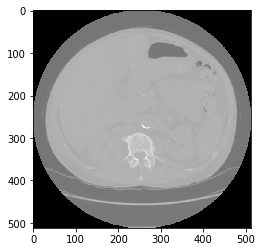

In [27]:
# First, load the pixel data - remember that we didn't load it for the sake of speed

slices_ct = [pydicom.dcmread(inst[0]) for inst in instances \
             if inst[1].SeriesInstanceUID == "1.2.826.0.1.3680043.2.1125.1.45859137663006505718300393375464286"]

slices_mr1 = [pydicom.dcmread(inst[0]) for inst in instances \
             if inst[1].SeriesInstanceUID == list(series_uids_modality_map.items())[4][0]]

slices_mr2 = [pydicom.dcmread(inst[0]) for inst in instances \
             if inst[1].SeriesInstanceUID == list(series_uids_modality_map.items())[9][0]]
plt.imshow(slices_ct[10].pixel_array, cmap="gray")


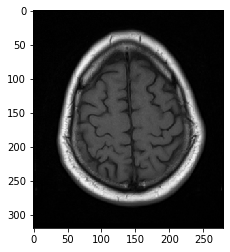

In [28]:
plt.imshow(slices_mr1[10].pixel_array, cmap="gray")

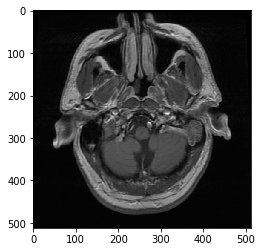

In [29]:
plt.imshow(slices_mr2[10].pixel_array, cmap="gray")

In [30]:
study_dates = sorted(np.unique([inst[1].StudyDate for inst in instances]))
study_dates

['19930622', '19940112', '19950329', '19951017', '20150116', '20190101']

In [31]:
print(np.unique([inst[1].StudyDate for inst in instances if inst[1].Modality == "CT"]))

['20190101']


In [32]:
slices_odd_mr = [pydicom.dcmread(inst[0]) for inst in instances \
             if inst[1].StudyDate == "20150116"]

In [33]:
print(np.unique([s.SeriesInstanceUID for s in slices_odd_mr]))
print(len(slices_odd_mr))

['1.3.12.2.1107.5.2.33.37105.2015011616025092819028166.0.0.0']
36


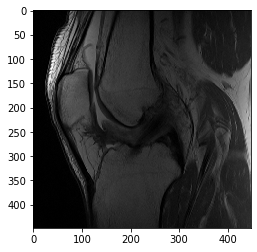

In [34]:
plt.imshow(slices_odd_mr[15].pixel_array, cmap="gray")

In [35]:
# print volumes
volumes = dict()

for inst in instances:
    sid = inst[1].SeriesInstanceUID
    if (sid not in volumes):
        volumes[sid] = dict()
        
    volumes[sid]["StudyDate"] = inst[1].StudyDate
    volumes[sid]["Width"] = inst[1].Columns
    volumes[sid]["Height"] = inst[1].Rows
    volumes[sid]["PatientId"] = inst[1].PatientID
    
    if ("slice_count" not in volumes[sid]):
        volumes[sid]["slice_count"] = 0
    else:
        volumes[sid]["slice_count"] += 1
    
    
for _,v in volumes.items():
    print(f"{v['Width']}x{v['Height']}x{v['slice_count']}  ")    

512x512x138  
448x448x35  
280x320x21  
280x320x21  
280x320x21  
280x320x21  
512x512x23  
512x512x23  
512x512x23  
512x512x23  
512x512x22  
512x512x22  
512x512x22  
512x512x22  
512x512x21  
512x512x5  
